In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("~/../../mnt/c/Users/Ethan/Downloads/archive/hacker_news_sample.csv")
data

,title,url,text,dead,by,score,time,type,id,parent,descendants,ranking,deleted,timestamp
0,NaN,NaN,&gt;<i>which leads me to say why are you using...,NaN,coldtea,NaN,1.390844e+09,comment,7131680,7127578.0,NaN,NaN,NaN,2014-01-27T17:31:13Z
1,NaN,NaN,I would like to point out some counter-example...,NaN,etanol,NaN,1.319396e+09,comment,3146879,3145330.0,NaN,NaN,NaN,2011-10-23T18:46:40Z
2,NaN,NaN,NaN,NaN,NaN,NaN,1.456641e+09,comment,11190089,11189361.0,NaN,NaN,True,2016-02-28T06:26:56Z
3,NaN,NaN,<i>Our msbuild implementation can now build Pr...,NaN,Locke1689,NaN,1.407882e+09,comment,8170491,8170071.0,NaN,NaN,NaN,2014-08-12T22:13:10Z
4,NaN,NaN,No matter how awful iPhoto is it's still bette...,NaN,miloshadzic,NaN,1.362573e+09,comment,5330773,5327590.0,NaN,NaN,NaN,2013-03-06T12:28:02Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659692,NaN,NaN,"They are still on book #79 ""Mystery of the Sac...",NaN,mynameishere,NaN,1.189823e+09,comment,54809,54631.0,NaN,NaN,NaN,2007-09-15T02:31:03Z
3659693,NaN,NaN,I&#x27;d argue rather it&#x27;s copyright law ...,NaN,ajarmst,NaN,1.434245e+09,comment,9713452,9711891.0,NaN,NaN,NaN,2015-06-14T01:23:00Z
3659694,NaN,NaN,that&#x27;s my startup! boom,True,woah,NaN,1.378690e+09,comment,6351340,6351046.0,NaN,NaN,NaN,2013-09-09T01:23:08Z
3659695,NaN,NaN,For one there&#x27;s less worry that you&#x27;...,NaN,aqme28,NaN,1.425258e+09,comment,9129747,9129736.0,NaN,NaN,NaN,2015-03-02T01:07:19Z


In [4]:
d2 = data.copy()
num_story = d2.loc[d2.type == "story", "type"].count()
num_comment = d2.loc[d2.type == "comment", "type"].count()
print(num_story, num_comment)

653757 3000341


In [5]:
d3 = d2.loc[d2.type == "story"]
score_freq = d3.groupby(["score"], sort = True)["score"].count().reset_index(name='frequency')

/tmp/ipykernel_722/3223394518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d4.frequency = np.log(d4.frequency)


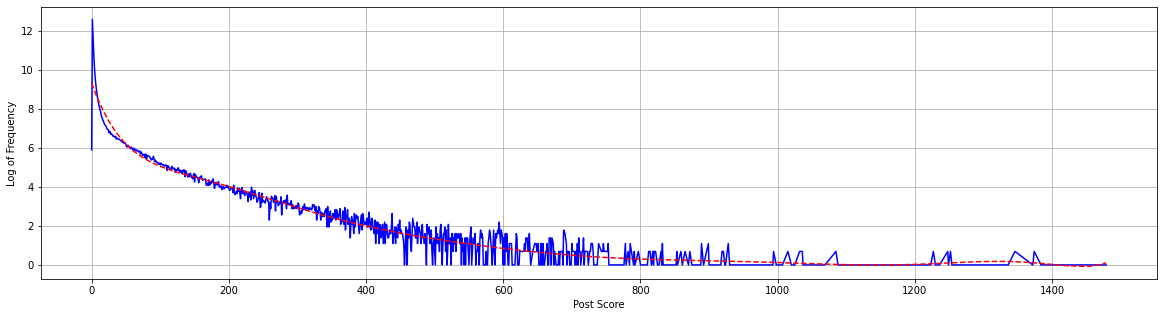

In [22]:
# plot direct distribution of scores

d4 = score_freq.loc[score_freq.score < 1500]
d4.frequency = np.log(d4.frequency)
x_axis = d4.score
y_axis = d4.frequency
plt.figure(figsize = (20, 5))
plt.plot(x_axis, y_axis, "b")
plt.grid()
z = np.polyfit(x_axis, y_axis, 10)
p = np.poly1d(z)
plt.plot(x_axis,p(x_axis),"r--")
plt.xlabel("Post Score")
plt.ylabel("Log of Frequency")
plt.show()

In [199]:
# plot average disribution of scores



0      543759.0
1      248133.0
2      134105.0
3       84482.0
4       60648.0
         ...   
898        10.0
899        10.0
900        10.0
901        10.0
902        10.0
Name: frequency, Length: 903, dtype: float64

646200


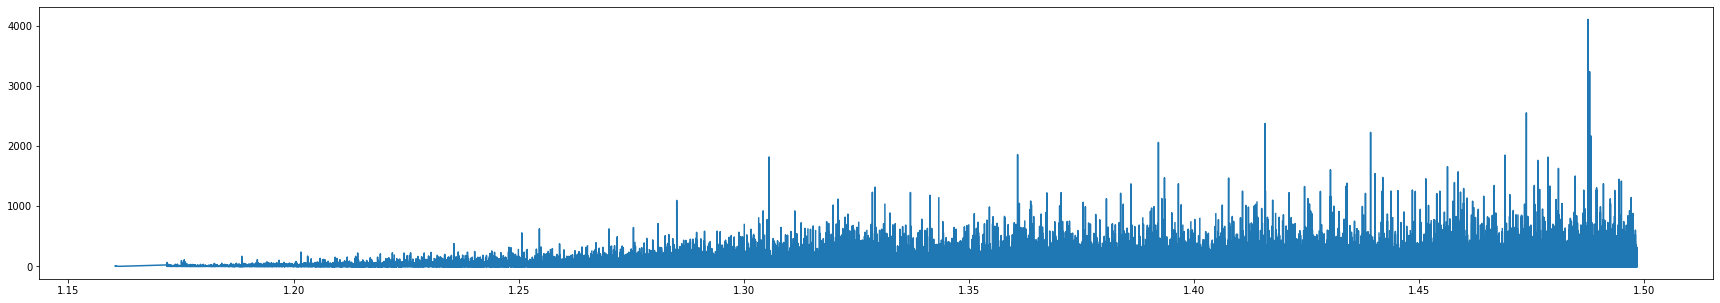

In [59]:
# group score over time

d5 = d2.loc[d2.type == "story"]
score_over_time = d5.groupby(["time"])["score"].mean().reset_index(name='average_score')
score_over_time["time"] = score_over_time["time"] / np.power(10,9)
plt.figure(figsize = (30, 5))
plt.plot(score_over_time["time"], score_over_time["average_score"])
plt.show()

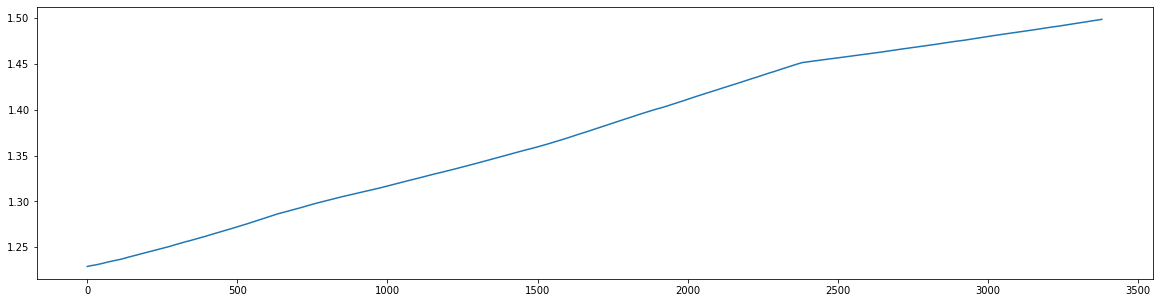

In [57]:
score_over_time
group_size = 0.0001
bottom = score_over_time["time"].min()
group_score = 0
group_count = 0
groups = []
i = bottom
while i <= score_over_time["time"].max():
    group_score = 0
    group_count = 0
    for time in score_over_time["time"]:
        if time < i:
            continue
        elif time > i + 0.1:
            break
        else:
            group_score += time
            group_count += 1
    groups.append(group_score / group_count)
    i += group_size

plt.figure(figsize = (20, 5))
plt.plot(np.arange(len(groups)), groups)
plt.show()